Setting up a fancy stylesheet

In [1]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

Setting up the required python&#8482; environment

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import bayes_mvs, linregress
from math import factorial
import scikits.bootstrap as bs
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

%matplotlib inline
filterwarnings('ignore')

# Linear regression

## Introduction

<p>In this lecture I will discuss the correlation between variables.  *Correlation* between variables refers to the existence of a relationship between them and *linear* refers to the fact that they are directly coupled.  As the value of one increases, the other either increases or decreases proportionally.  This proportionality is constant, i.e. one or both are not squared or subject to a transcedental transformation.</p>
<p>Many mathematical steps are required to calculate the relationship between two variables.  Fortunately these can all be done with a few simple Python&#8482; functions.</p>

## Simple linear regeression

<p>With linear regression we are directly comparing two sets of numerical variables as opposed to two sets of numerical variables locked up in two categorical groups.</p>
<p>The best way to start comparing two sets of numerical variables is to plot them on a Cartesian coordinate (*xy*) plane.  We choose one variable to appear on the *x*-axis and one on the*y*-axis.  We then take a row of data (i.e. from the same patient), find the corresponding entries for the two variables and plot them on our *xy*-plane.  For this to happen, we need to make sure that for every row, both values are available.</p>
<p>It is necessary to discard entries when both values are not available.  This can happen frequently in clinical data collection.</p>
<p>Let's give it a go with this data set.</p>

In [3]:
reg_data = pd.read_csv('Regression.csv') # Reading in the csv file and saving it as a computer
# variable named reg_data, which is then a DataFrame object
reg_data # Displaying all the data

,PCT,CRP
0,2.6,32.6
1,9.8,88.2
2,4.9,44.6
3,7.7,84.2
4,2.3,14.3
5,9.7,106.8
6,NaN,97.4
7,9.8,91.9
8,3.4,31.7
9,3.5,25.0


<p>First off we note that there are two variables in our data set; procalcitonin (PCT) and C-reactive protein (CRP).  Both are ratio-type numerical data.  Lastly, we note that some of the data entries are missing.<p>
<p>So, before we go ahead and do all of this, let's get rid of all the rows that do not contain any data (even if only one of the two are absent).</p>

In [4]:
reg_data_2 = reg_data.dropna(subset = ['PCT', 'CRP']) # The subset = [] argument lists all the
# columns from which you would like empty entries to be removed
reg_data_2

,PCT,CRP
0,2.6,32.6
1,9.8,88.2
2,4.9,44.6
3,7.7,84.2
4,2.3,14.3
5,9.7,106.8
7,9.8,91.9
8,3.4,31.7
9,3.5,25.0
10,7.0,64.1


<p>Note how all the rows where an entry was missing, was removed.</p>

<p>As per usual, we can describe our data and even get the normal violin plots (or boxplots if you prefere those) going, so that we can get a feel for our data.</p>

In [5]:
reg_data_2['PCT'].describe()

count    26.000000
mean      6.346154
std       2.362749
min       2.300000
25%       4.925000
50%       6.150000
75%       8.175000
max       9.800000
Name: PCT, dtype: float64

In [6]:
reg_data_2['CRP'].describe()

count     26.000000
mean      61.807692
std       25.329081
min       14.300000
25%       46.600000
50%       57.550000
75%       84.575000
max      106.800000
Name: CRP, dtype: float64

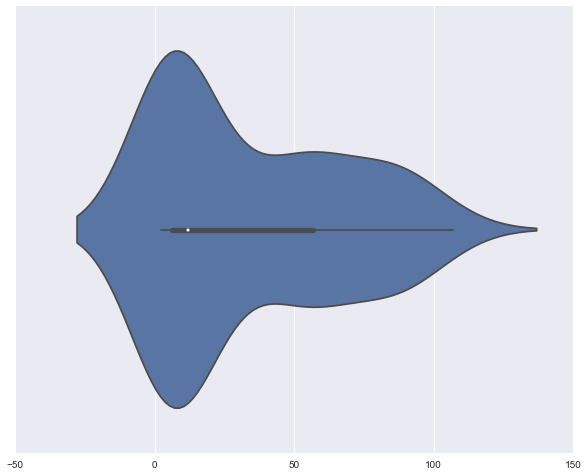

In [7]:
plt.figure(figsize = (10, 8))
sns.violinplot(reg_data_2, groupby = ['PCT', 'CRP'], names = ['PCT', 'CRP'])
plt.show();

<p>Now, let's do some linear regression to see if these two variables are correlated.</p>

In [8]:
slope, intercept, r_value, p_value, std_err = linregress(reg_data_2['PCT'], reg_data_2['CRP'])
# The linregress function takes arguments for the x and y values

<p>We use the *linregress()* function that is part of the *scipy.stats* module.  It returns five values, hence the fact that we put five computer variables names up front.  Here I have chosen descriptive names, precisely for what the five values are.</p>
<p>The first two are to do with a line we can draw across our eventual plot.  It creates a mathematical equation that represents our data and from which we can make certain predictions.  You might remember from school algebra that a straight line comes in the form of $ {y = mx + c} $, where *y* represent the *y*-value for every *x*-value.  The *m* represents the *slope* (how steep the line is) and the *c* represents the *y*-intercept.  That is where *x* is zero (i.e. where the line crosses the *y*-axis.  In our example code above called *intercept*.</p>
<p>The *r_value* is the correlation coefficient.  More about this below.</p>
<p>The *p_value* is our good, old friend and the *std_err* is the standard error.</p>

In [9]:
print('The slope of the line is', slope, '\n') # The '\n' is an empty line
print('The y-intercept is ', intercept, '\n')
print('The correlation coefficient is ', r_value, '\n')
print('The p-value is ', p_value, '\n')
print('The standard error is ', std_err, '\n')

The slope of the line is 10.3586483239 

The y-intercept is  -3.92988359403 

The correlation coefficient is  0.966276272656 

The p-value is  1.20224468352e-15 

The standard error is  0.563489991611 



<p>Before we go any further, let's plot this data.</p>

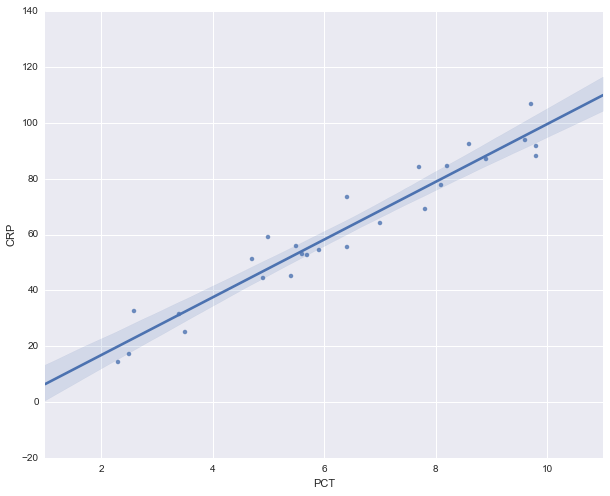

In [10]:
plt.figure(figsize = (10, 8))
sns.regplot(reg_data_2['PCT'], reg_data_2['CRP'], ci=95, n_boot=1000)
# regplot takes many arguments
# Listed here are the x and y data values
# The ci refers to calculating a confidence interval (value given)
# The n_boot gives a value for bootstrapping to get the ci values
plt.show();

<p>So, the slope of our line is about *10*.  That means that for every increase in the *x*-axis PCT level, the *y*-axis CRP value increases by *10*.  This value is positive, hence we can say that there is a *positive* correlation between thses variables.  If one goes up, so does the other.  In a negative correlation the *slope* value is negative, meaning that as one variable value increases the other decreases.<p>
<p>The intercept is almost *-4*.  It is just a mathematical curiosity, so as to be able to draw the line.  Certainly if the PCT is *0*, we can't have a CRP value of *-4*.  So, you have to use some common sense.</p>
<p>With these two values, though, we can write an equation in the form above ($ y = mx + c $).  Here we go: $ CRP = (10 * PCT) - 4 $.  So, given our model, we can predict that in any patient in the population, a certain PCT value will correlate with a calculated CRP value.  Neat!</p>

### Correlation coefficient

<p>The *r_value* as mentioned above is the correlation coefficient, also known as the *Pearson correlation coefficient*.  It gives us a numerical value between *-1* and *1* and represents how well the two variables are correlated.  A perferct *-1* means a perfect negative correlation.  All the dots on the graph will fall on the straight line.  A perfect score of *1* is perect psoitive correlation and a value of *0* means no correlation at all.<p>
<p>It is common to find this value squared, which is called the *coefficient of determination*.  This means we only have to deal eith values from *0* to *1*, so simply a value to tell us how well correlated the values are.</p>
<p>In our example above we have a Pearson correlation coeffienenct of about *0.97*.  This means the variables are well correlated indeed.<p>

### p-value

<p>A *p*-value can also be calculated.  In our data set above it is well below 0.05.</p>

### IMPORTANT

<p>Remember the dictum: **Correlation does not mean causation!**  Even though variables are correlated is does not infer a causal relationship.  In our example here, a PCT value does not cause a CRP value!</p>

## Using our appendix data

<p>Let's do another example using our appendicitis data set.  I'll just run through the code.</p>

## Importing and verifying our data

In [11]:
data = pd.read_csv('MOOC_Mock.csv')
data.head(3)

,File,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
0,1,38,Female,3,6,No,No,NaN,97,35.2,NaN,10.49,10.4,No,Yes,Yes,5
1,2,32,Male,6,10,No,Yes,57,109,38.8,45.3,7.08,19.8,No,No,Yes,8
2,3,19,Female,1,16,No,No,NaN,120,36.3,10.7,13.00,8.7,No,No,No,3


## Plotting admission white cell count and temperature

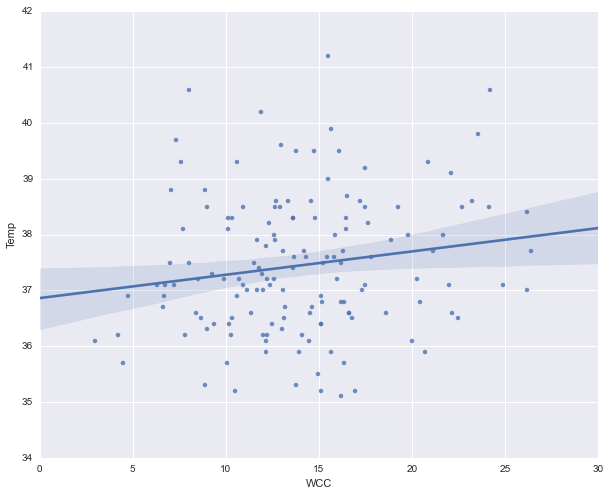

In [13]:
data_2 = data.dropna(subset = ['Temp', 'WCC'])

plt.figure(figsize = (10, 8))
sns.regplot(data_2['WCC'], data_2['Temp'], x_ci=95, scatter=True, fit_reg=True, ci=95, n_boot=1000, dropna=True,
            label='Correlating admission WCC and temperature', color=None)

In [14]:
slope, intercept, r_value, p_value, std_err = linregress(data_2['WCC'], data_2['Temp'])

In [15]:
slope

0.041778956836434247

In [16]:
r_value

0.16559394522007634

In [17]:
p_value

0.045022859353589129

In [18]:
std_err

0.020662910878972714